# Plotting rho log rho

In [29]:
# trainToyOTflow.py
# training driver for the two-dimensional toy problems
import argparse
import os
import time
import datetime
import torch.optim as optim
import numpy as np
import math
import lib.toy_data as toy_data
import lib.utils as utils
from lib.utils import count_parameters
from src.plotter import plot4_gf
from src.OTFlowProblem import *
import config
import matplotlib.pyplot as plt

%matplotlib inline 

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

save = 'experiments'
nt = 1
alph = [1.0,1.0,0.0]
m = 64
nTh = 3
n_tau = 15
h = 1.0 / nt
tau = 0.025
d = 2

# get precision type
prec = torch.float32

torch.set_default_dtype(prec)
cvt = lambda x: x.type(prec).to(device, non_blocking=True)

In [30]:
net_list = []
for i in range(n_tau+1):
    filename = os.path.join(save, f'2gaussians_alph1_0_m{m}_n{i}_checkpt.pth')
    print(f"loading {filename}")
    checkpt  = torch.load(filename, map_location=lambda storage, loc: storage)
    net1     = Phi(nTh=nTh, m=m, d=d, alph=alph)
    prec1    = checkpt['state_dict']['A'].dtype
    net1     = net1.to(prec1).to(device)
    net1.load_state_dict(checkpt['state_dict'])
    net_list.append(net1)

batch_size = 200
x0,rho = toy_data.inf_train_gen("2gaussians", batch_size=batch_size)
x0 = cvt(torch.from_numpy(x0))
rho = cvt(torch.from_numpy(rho))

# get the inital density from net_list. Given an initial density at t=0, iterate through n_tau - 1
rho_next = rho


Tx_list = [x0]
with torch.no_grad(): 
    z = torch.zeros((x0.shape[0], d+3))
    z[:,:d] = x0
    for n in range(n_tau):
        tk = 0
        for k in range(nt):
            z = stepRK4(odefun, z, net_list[n], alph, tk, tk + h)
            tk += h
            rho_next = rho_next / torch.exp(z[:,d])
        Tx = z[:,0:d]
        Tx_list.append(Tx)
        z[:,d:] = 0

loading experiments/2gaussians_alph1_0_m64_n0_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n1_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n2_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n3_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n4_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n5_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n6_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n7_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n8_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n9_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n10_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n11_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n12_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n13_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n14_checkpt.pth
loading experiments/2gaussians_alph1_0_m64_n15_checkpt.pth


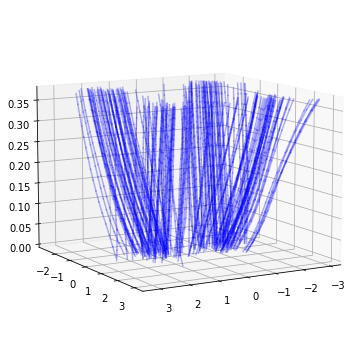

In [31]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
# ax.scatter(Tx[:,0],Tx[:,1],n*tau, color='blue', alpha= n_tau_inner*tau)
for n in range(len(Tx_list)-1):
    Tx_pre = Tx_list[n]
    Tx     = Tx_list[n+1]
    for ind in range(Tx.shape[0]):
        ax.plot([Tx[ind,0],Tx_pre[ind,0]],[Tx[ind,1],Tx_pre[ind,1]],[(n+1)*tau,n*tau], color='blue',alpha=0.3)
ax.view_init(10,60)
plt.savefig("rhologrho-3d-lines.png")
plt.show()

# Plotting porous

In [52]:
save = 'experiments-porous-2d-tau-0.01'
nt = 1
alph = [1.0,1.0,0.0]
m = 128
nTh = 3
n_tau = 10
tau = 0.01
d= 2

# get precision type
prec = torch.float32

torch.set_default_dtype(prec)
cvt = lambda x: x.type(prec).to(device, non_blocking=True)
net_list = []
for i in range(n_tau+1):
    filename = os.path.join(save, f'porous_alph1_0_m{m}_n{i}_checkpt.pth')
    print(f"loading {filename}")
    checkpt  = torch.load(filename, map_location=lambda storage, loc: storage)
    net1     = Phi(nTh=nTh, m=m, d=d, alph=alph)
    prec1    = checkpt['state_dict']['A'].dtype
    net1     = net1.to(prec1).to(device)
    net1.load_state_dict(checkpt['state_dict'])
    net_list.append(net1)

loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n0_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n1_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n2_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n3_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n4_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n5_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n6_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n7_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n8_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n9_checkpt.pth
loading experiments-porous-2d-tau-0.01/porous_alph1_0_m128_n10_checkpt.pth


In [50]:
batch_size = 500
x0,rho = toy_data.inf_train_gen("porous", batch_size=batch_size)
x0  = cvt(torch.from_numpy(x0))
rho = cvt(torch.from_numpy(rho))

h = 1.0 / nt

# get the inital density from net_list. Given an initial density at t=0, iterate through n_tau - 1
rho_next = rho
Tx_list = [x0]
with torch.no_grad(): 
    z = torch.zeros((x0.shape[0], d+3)) ; z[:,:d] = x0
    for n in range(n_tau):
        tk = 0
        for k in range(nt):
            z = stepRK4(odefun, z, net_list[n], alph, tk, tk + h)
            tk += h
            rho_next = rho_next / torch.exp(z[:,d])
        Tx_list.append(z[:,:d])
        z[:,d:] = 0

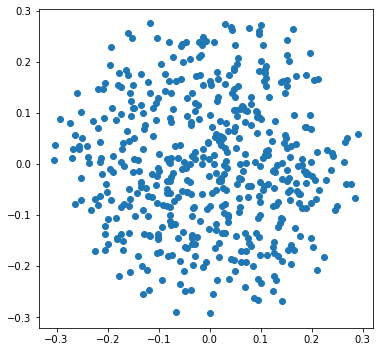

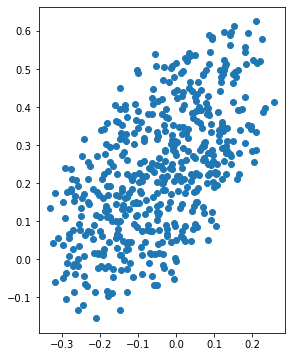

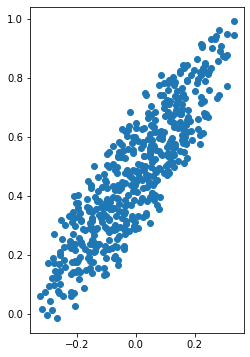

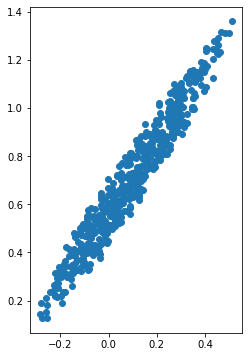

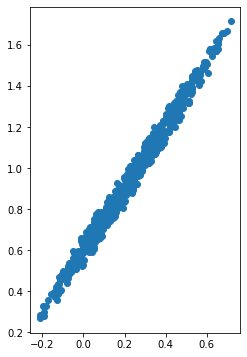

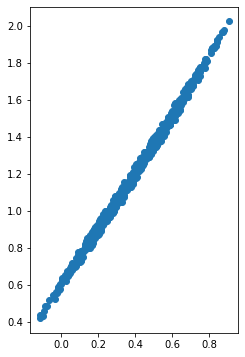

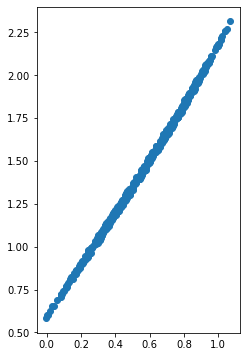

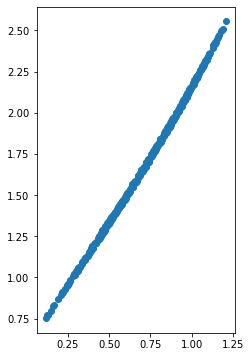

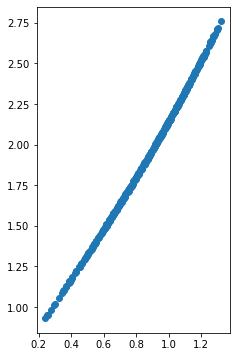

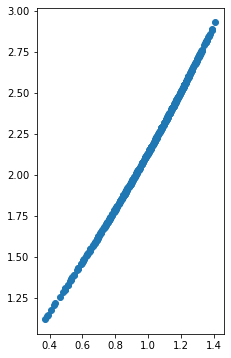

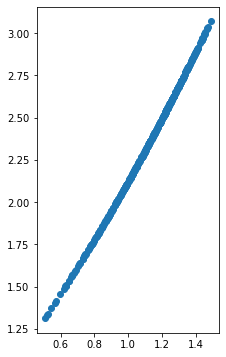

In [51]:

for i, it in enumerate(Tx_list):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.scatter(it[:,0], it[:,1]) #,alpha=1.0*i/len(Tx_list))
    # break
    ax.set_aspect('equal')
    plt.show()